# 📊 Heart Disease Predictor

## 📌 Dataset Overview
explore the heart disease dataset using various visualizations.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("heart.csv")

# Display basic dataset information
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(None,
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
 0   40   M           ATA        140          289          0     Normal    172   
 1   49   F           NAP        160          180          0     Normal    156   
 2   37   M           ATA        130          283          0         ST     98   
 3   48   F           ASY        138          214          0     Normal    108   
 4   54   M           NAP        150          195          0     Normal    122   
 
   ExerciseAngina  Oldpeak ST_Slope  target  
 0              N      0.0       Up       0  
 1              N      1.0     Flat       1  
 2              N      0.0       Up       0  
 3              Y      1.5     Flat       1  
 4              N      0.0       Up       0  )

## 📊 Age Distribution

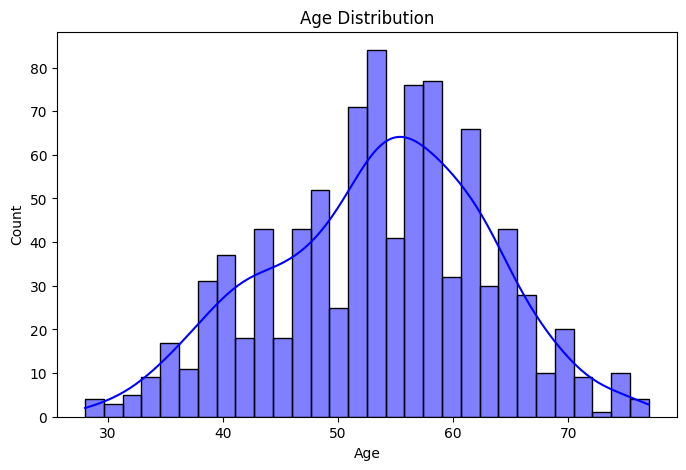

In [2]:

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## 📊 Cholesterol Distribution

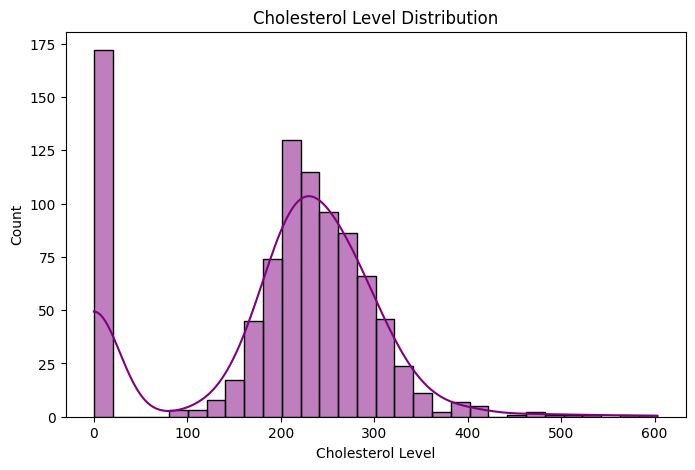

In [3]:

plt.figure(figsize=(8,5))
sns.histplot(df['Cholesterol'], bins=30, kde=True, color='purple')
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()


## 🏥 Heart Disease Cases by Age

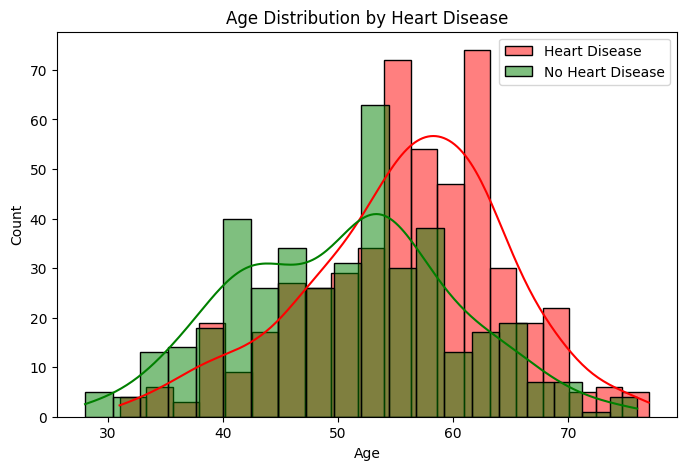

In [4]:

plt.figure(figsize=(8,5))
sns.histplot(df[df['target'] == 1]['Age'], bins=20, color='red', label='Heart Disease', kde=True)
sns.histplot(df[df['target'] == 0]['Age'], bins=20, color='green', label='No Heart Disease', kde=True)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


## 👨‍⚕️ Heart Disease by Gender

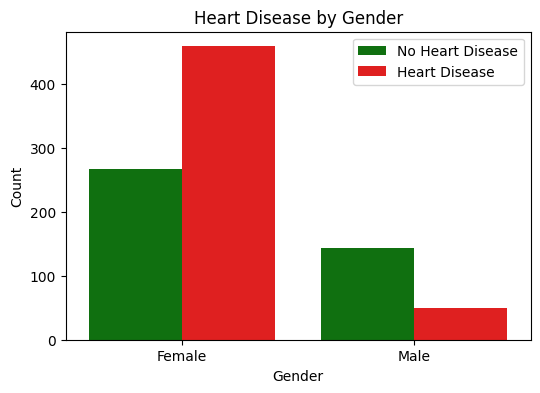

In [5]:

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='target', data=df, palette={0: 'green', 1: 'red'})
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()


## 🌟 Feature Importance (Random Forest)

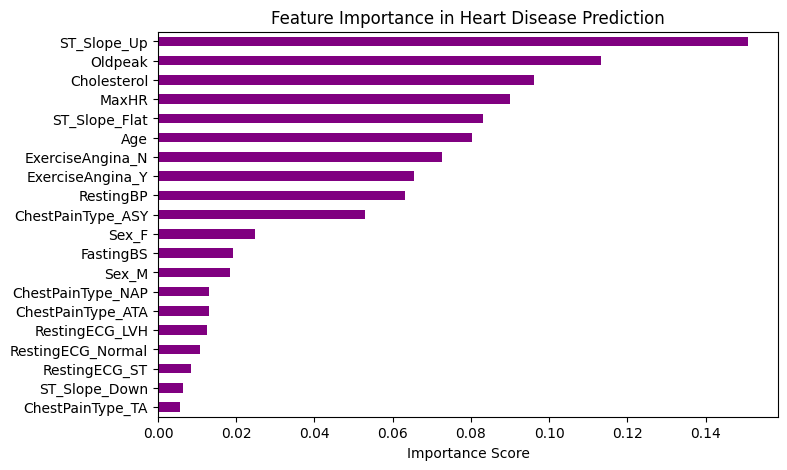

In [6]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data (Handle categorical variables)
X = df.drop(columns=['target'])
X = pd.get_dummies(X)  # Convert categorical variables to dummy/indicator variables
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance plot
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), color='purple')
plt.title('Feature Importance in Heart Disease Prediction')
plt.xlabel('Importance Score')
plt.show()


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Prepare data (Handle categorical variables)
X = df.drop(columns=['target'])
X = pd.get_dummies(X)  # Convert categorical variables to dummy/indicator variables
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, precision, recall, f1])

# Convert results to a pretty table
table = tabulate(results, headers=["Model", "Accuracy", "Precision", "Recall", "F1 Score"], tablefmt="grid")
print(table)


c:\Users\santosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+------------------------+------------+-------------+----------+------------+
| Model                  |   Accuracy |   Precision |   Recall |   F1 Score |
+========================+============+=============+==========+============+
| Logistic Regression    |   0.853261 |    0.9      | 0.841121 |   0.869565 |
+------------------------+------------+-------------+----------+------------+
| Random Forest          |   0.880435 |    0.904762 | 0.88785  |   0.896226 |
+------------------------+------------+-------------+----------+------------+
| Support Vector Machine |   0.853261 |    0.9      | 0.841121 |   0.869565 |
+------------------------+------------+-------------+----------+------------+
| K-Nearest Neighbors    |   0.706522 |    0.773196 | 0.700935 |   0.735294 |
+------------------------+------------+-------------+----------+------------+
| Gradient Boosting      |   0.880435 |    0.912621 | 0.878505 |   0.895238 |
+------------------------+------------+-------------+----------+

### Predictor

In [8]:
import numpy as np

# Function to take user input and predict heart disease
def predict_heart_disease(model, input_data):
    # Convert input data to DataFrame (ensure column alignment)
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Predict using trained model
    prediction = model.predict(input_df)[0]
    
    # Return result
    return "Heart Disease Detected! 🚨" if prediction == 1 else "No Heart Disease. ✅"

# Example input (Replace these values with real inputs)
no_disease_input = {
    'Age': 50, 'Sex_M': 1, 'Sex_F': 0, 'ChestPainType_ATA': 0, 'ChestPainType_NAP': 1, 
    'ChestPainType_ASY': 0, 'RestingBP': 130, 'Cholesterol': 250, 'FastingBS': 0, 
    'RestingECG_Normal': 1, 'RestingECG_ST': 0, 'MaxHR': 150, 'ExerciseAngina_Y': 0, 
    'Oldpeak': 1.2, 'ST_Slope_Up': 1, 'ST_Slope_Flat': 0
}

# to show heart disease detected 
disease_input = {
    'Age': 65, 'Sex_M': 1, 'Sex_F': 0, 'ChestPainType_ATA': 0, 'ChestPainType_NAP': 0, 
    'ChestPainType_ASY': 1, 'RestingBP': 160, 'Cholesterol': 300, 'FastingBS': 1, 
    'RestingECG_Normal': 0, 'RestingECG_ST': 1, 'MaxHR': 120, 'ExerciseAngina_Y': 1, 
    'Oldpeak': 3.5, 'ST_Slope_Up': 0, 'ST_Slope_Flat': 1
}

# Use the best model (Random Forest in this example) to predict
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)  # Ensure model is trained

# Predict using example input
result = predict_heart_disease(best_model, disease_input)
print("Prediction:", result)



Prediction: Heart Disease Detected! 🚨


Why disease_input works:
- ✅ Age 65+ → Higher risk
- ✅ Chest Pain Type: ASY (Asymptomatic) → Often linked to heart issues
- ✅ High Blood Pressure (160) & High Cholesterol (300)
- ✅ Fasting Blood Sugar > 120 mg/dl → Indicator of diabetes risk
- ✅ Exercise-Induced Angina → Pain during exertion
- ✅ ST Depression (Oldpeak = 3.5) & Abnormal ECG